In [5]:
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import numpy as np

In [6]:
# 自分のアカウント情報をloadする。（あらかじめ IBMQ.save_account を実行しておく必要がある. 複数のアカウントを使い分ける時はここで行う)
provider = IBMQ.load_account()

# 自分のアカウントで使用できるバックエンドを見る
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [26]:
provider_2 = IBMQ.get_provider(hub= 'ibm-q-utokyo', group='keio-internal', project='keio-students')

In [28]:
provider_2.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_sydney') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-utokyo', group='keio-internal', project='keio-students')>,


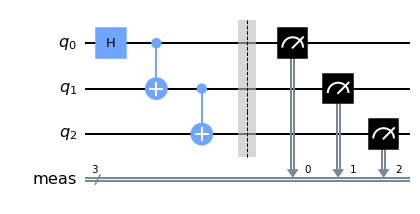

In [54]:
circ_GHZ=QuantumCircuit(3)
circ_GHZ.h(0)
circ_GHZ.cx(0,1)
circ_GHZ.cx(1,2)
circ_GHZ.measure_all()
circ_GHZ.draw('mpl')

{'000': 517, '111': 507}


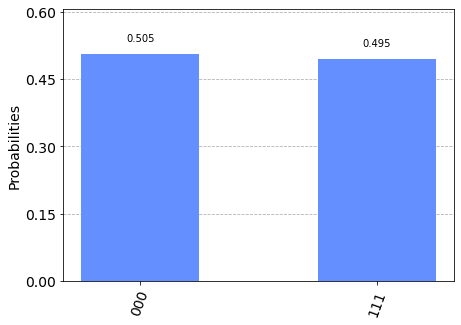

In [16]:
backend_sim=Aer.get_backend('qasm_simulator')
result=execute(circ_GHZ,backend_sim,shots=1024).result()
print(result.get_counts(circ_GHZ))
plot_histogram(result.get_counts(circ_GHZ))

{'000': 467, '001': 3, '010': 1, '011': 15, '100': 11, '101': 1, '110': 9, '111': 517}


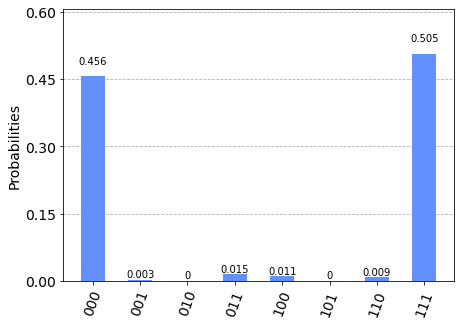

In [32]:
backend_qc=provider_2.get_backend('ibm_kawasaki') 
result=execute(circ_GHZ,backend_qc,shots=1024).result()
print(result.get_counts(circ_GHZ))
plot_histogram(result.get_counts(circ_GHZ))

In [74]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

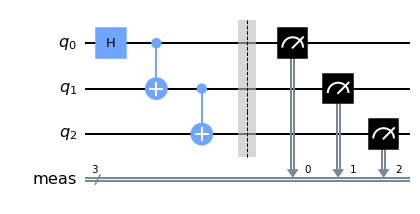

In [75]:
circ_GHZ=QuantumCircuit(3)
circ_GHZ.h(0)
circ_GHZ.cx(0,1)
circ_GHZ.cx(1,2)
circ_GHZ.measure_all()
circ_GHZ.draw('mpl')

In [86]:
# Create an empty noise model
noise_model = NoiseModel()

# Add depolarizing error to all single qubit u1, u2, u3 gates
error_1 = depolarizing_error(0.99, 1)
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
error_2 = depolarizing_error(0.99, 2)
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])


NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'cx', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']


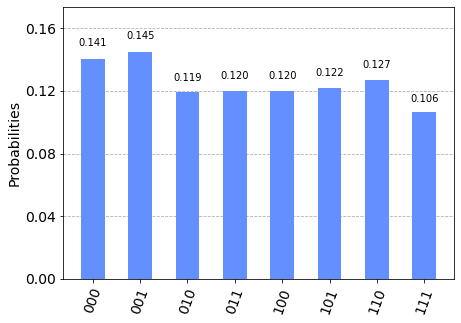

In [108]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ_GHZ,sim_noise)

# Run and get counts
result_depolarization = sim_noise.run(circ_tnoise,shots=1024).result()
counts_depolarization = result_depolarization.get_counts(0)

# Plot noisy output
plot_histogram(counts_depolarization)

In [117]:
counts_depolarization_clt=[]
for p in range(5):
    # Create an empty noise model
    noise_model = NoiseModel()

    # Add depolarizing error to all single qubit u1, u2, u3 gates
    error_1 = depolarizing_error(0.2*(p+1), 1)
    noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
    error_2 = depolarizing_error(0.2*(p+1), 2)
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    # Create noisy simulator backend
    sim_noise = AerSimulator(noise_model=noise_model)

    # Transpile circuit for noisy basis gates
    circ_tnoise = transpile(circ_GHZ,sim_noise)

    # Run and get counts
    result_depolarization = sim_noise.run(circ_tnoise,shots=1024).result()
    counts_depolarization = result_depolarization.get_counts(0)
    counts_depolarization_clt.append(counts_depolarization)

    # Plot noisy output

NameError: name 'plot' is not defined

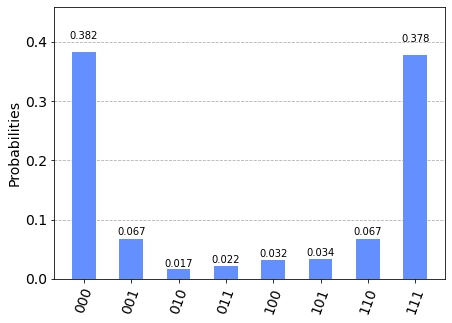

In [118]:
plot_histogram(counts_depolarization_clt[0])

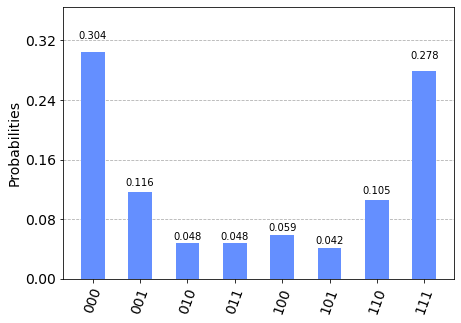

In [119]:
plot_histogram(counts_depolarization_clt[1])

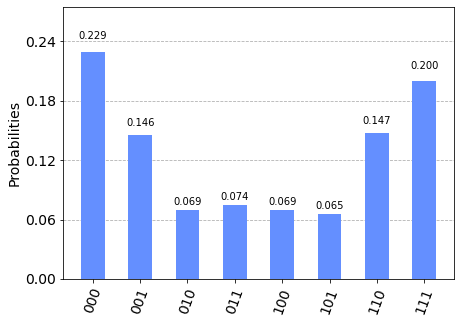

In [120]:
plot_histogram(counts_depolarization_clt[2])

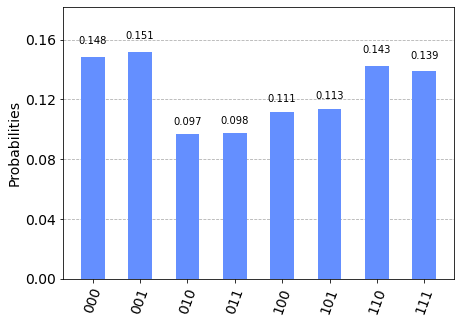

In [121]:
plot_histogram(counts_depolarization_clt[3])

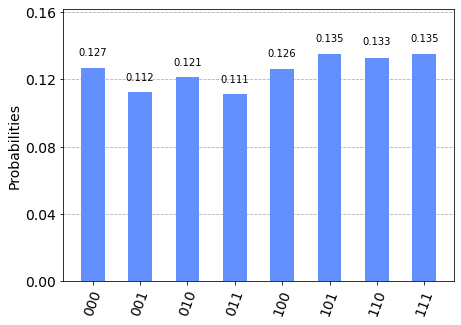

In [122]:
plot_histogram(counts_depolarization_clt[4])